In [88]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [89]:
df_br = df[df['job_country'] == 'Brazil'].copy()
df_br

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
14,Data Engineer,Data Engineer,"Rio de Janeiro, State of Rio de Janeiro, Brazil",via BeBee,Full-time,False,Brazil,2023-07-13 13:17:51,False,False,Brazil,None,NaN,NaN,Oowlish,"['mongodb', 'mongodb']","{'databases': ['mongodb'], 'programming': ['mo..."
55,Data Scientist,Data Scientist,"São Paulo, State of São Paulo, Brazil",via BeBee,Full-time,False,Brazil,2023-01-03 23:02:27,False,False,Brazil,None,NaN,NaN,Mars,"['python', 'sql', 'azure']","{'cloud': ['azure'], 'programming': ['python',..."
84,Data Scientist,Data Science,Brazil,via BeBee,Full-time,False,Brazil,2023-01-23 13:20:12,False,False,Brazil,None,NaN,NaN,Pfizer,"['python', 'r', 'sql', 'javascript', 'aws', 's...","{'cloud': ['aws', 'snowflake'], 'libraries': [..."
169,Data Analyst,Digital Analyst,Anywhere,via LinkedIn,Full-time and Contractor,True,Brazil,2023-12-05 13:10:20,True,False,Brazil,None,NaN,NaN,Acadia,"['firebase', 'firebase']","{'cloud': ['firebase'], 'databases': ['firebas..."
282,Data Engineer,Data Engineer,"Barueri, State of São Paulo, Brazil",via BeBee,Full-time,False,Brazil,2023-02-09 13:34:09,False,False,Brazil,None,NaN,NaN,Decision Group,"['nosql', 'java', 'python', 'scala', 'sql', 'a...","{'cloud': ['aws'], 'libraries': ['spark', 'had..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784760,Software Engineer,MS Engineer,"São Paulo, State of São Paulo, Brazil",via Empregos Trabajo.org,Full-time,False,Brazil,2023-01-19 06:24:07,False,False,Brazil,None,NaN,NaN,NTT,['outlook'],{'analyst_tools': ['outlook']}
784968,Business Analyst,Communications and Reporting Analyst,Brazil,via Empregos Trabajo.org,Full-time,False,Brazil,2023-01-19 06:23:46,True,False,Brazil,None,NaN,NaN,PNUD Argentina,['sheets'],{'analyst_tools': ['sheets']}
785223,Senior Data Engineer,Data Engineer Sênior,"Indaiatuba, State of São Paulo, Brazil",via BeBee,Full-time,False,Brazil,2023-01-16 06:21:47,True,False,Brazil,None,NaN,NaN,GRUPO R1H1,"['python', 'sql', 'git']","{'other': ['git'], 'programming': ['python', '..."
785342,Machine Learning Engineer,Automation Engineer,"Belo Horizonte, State of Minas Gerais, Brazil",via BeBee,Full-time,False,Brazil,2023-01-18 06:23:26,False,False,Brazil,None,NaN,NaN,Worley,"['word', 'excel', 'powerpoint']","{'analyst_tools': ['word', 'excel', 'powerpoin..."


In [90]:
df_br['job_posted_month'] = df_br['job_posted_date'].dt.strftime('%B')
df_br.drop_duplicates(subset=['job_title','company_name'], inplace=True)
df_br


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
14,Data Engineer,Data Engineer,"Rio de Janeiro, State of Rio de Janeiro, Brazil",via BeBee,Full-time,False,Brazil,2023-07-13 13:17:51,False,False,Brazil,None,NaN,NaN,Oowlish,"['mongodb', 'mongodb']","{'databases': ['mongodb'], 'programming': ['mo...",July
55,Data Scientist,Data Scientist,"São Paulo, State of São Paulo, Brazil",via BeBee,Full-time,False,Brazil,2023-01-03 23:02:27,False,False,Brazil,None,NaN,NaN,Mars,"['python', 'sql', 'azure']","{'cloud': ['azure'], 'programming': ['python',...",January
84,Data Scientist,Data Science,Brazil,via BeBee,Full-time,False,Brazil,2023-01-23 13:20:12,False,False,Brazil,None,NaN,NaN,Pfizer,"['python', 'r', 'sql', 'javascript', 'aws', 's...","{'cloud': ['aws', 'snowflake'], 'libraries': [...",January
169,Data Analyst,Digital Analyst,Anywhere,via LinkedIn,Full-time and Contractor,True,Brazil,2023-12-05 13:10:20,True,False,Brazil,None,NaN,NaN,Acadia,"['firebase', 'firebase']","{'cloud': ['firebase'], 'databases': ['firebas...",December
282,Data Engineer,Data Engineer,"Barueri, State of São Paulo, Brazil",via BeBee,Full-time,False,Brazil,2023-02-09 13:34:09,False,False,Brazil,None,NaN,NaN,Decision Group,"['nosql', 'java', 'python', 'scala', 'sql', 'a...","{'cloud': ['aws'], 'libraries': ['spark', 'had...",February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784526,Cloud Engineer,Engineer Manager,"São Paulo, State of São Paulo, Brazil",via BeBee,Full-time,False,Brazil,2023-01-20 07:07:22,False,False,Brazil,None,NaN,NaN,Farfetch,"['ruby', 'ruby', 'javascript', 'ruby on rails']","{'programming': ['ruby', 'javascript'], 'webfr...",January
784710,Software Engineer,Software Engineer Staff São Paulo,"São Paulo, State of São Paulo, Brazil",via Empregos Trabajo.org,Full-time,False,Brazil,2023-01-28 07:04:06,True,False,Brazil,None,NaN,NaN,MUSA,"['python', 'golang', 'aws', 'git', 'docker', '...","{'cloud': ['aws'], 'other': ['git', 'docker', ...",January
784711,Data Scientist,Consultor Big Data,"São Paulo, State of São Paulo, Brazil",via BeBee,Full-time,False,Brazil,2023-10-11 06:24:38,True,False,Brazil,None,NaN,NaN,Netvagas - (445691131),"['sql', 'hadoop']","{'libraries': ['hadoop'], 'programming': ['sql']}",October
785342,Machine Learning Engineer,Automation Engineer,"Belo Horizonte, State of Minas Gerais, Brazil",via BeBee,Full-time,False,Brazil,2023-01-18 06:23:26,False,False,Brazil,None,NaN,NaN,Worley,"['word', 'excel', 'powerpoint']","{'analyst_tools': ['word', 'excel', 'powerpoin...",January


In [91]:
df_br_job_count = df_br.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
df_br_job_count

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
April,31,16,33,94,40,9,1,41,17,70
August,64,24,55,151,63,17,11,55,23,72
December,34,16,40,106,41,13,8,32,12,63
February,22,5,23,114,37,8,7,42,7,69
January,38,22,44,198,87,20,10,48,24,104
July,34,22,48,135,95,17,10,44,27,81
June,34,12,37,157,43,21,10,45,19,45
March,19,9,40,114,40,10,4,45,20,77
May,16,5,20,88,40,4,7,42,13,36


In [92]:
df_br_job_count.reset_index(inplace=True)
df_br_job_count

job_title_short,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
0,April,31,16,33,94,40,9,1,41,17,70
1,August,64,24,55,151,63,17,11,55,23,72
2,December,34,16,40,106,41,13,8,32,12,63
3,February,22,5,23,114,37,8,7,42,7,69
4,January,38,22,44,198,87,20,10,48,24,104
5,July,34,22,48,135,95,17,10,44,27,81
6,June,34,12,37,157,43,21,10,45,19,45
7,March,19,9,40,114,40,10,4,45,20,77
8,May,16,5,20,88,40,4,7,42,13,36
9,November,48,16,34,113,69,23,24,50,14,70


In [93]:
df_br_job_count['month_number'] = pd.to_datetime(df_br_job_count['job_posted_month'], format='%B').dt.month
df_br_job_count

job_title_short,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,month_number
0,April,31,16,33,94,40,9,1,41,17,70,4
1,August,64,24,55,151,63,17,11,55,23,72,8
2,December,34,16,40,106,41,13,8,32,12,63,12
3,February,22,5,23,114,37,8,7,42,7,69,2
4,January,38,22,44,198,87,20,10,48,24,104,1
5,July,34,22,48,135,95,17,10,44,27,81,7
6,June,34,12,37,157,43,21,10,45,19,45,6
7,March,19,9,40,114,40,10,4,45,20,77,3
8,May,16,5,20,88,40,4,7,42,13,36,5
9,November,48,16,34,113,69,23,24,50,14,70,11


In [94]:
df_br_job_count.sort_values(by='month_number', inplace=True)
df_br_job_count.set_index('job_posted_month', inplace=True)
df_br_job_count.drop(columns='month_number', inplace=True)
df_br_job_count

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,38,22,44,198,87,20,10,48,24,104
February,22,5,23,114,37,8,7,42,7,69
March,19,9,40,114,40,10,4,45,20,77
April,31,16,33,94,40,9,1,41,17,70
May,16,5,20,88,40,4,7,42,13,36
June,34,12,37,157,43,21,10,45,19,45
July,34,22,48,135,95,17,10,44,27,81
August,64,24,55,151,63,17,11,55,23,72
September,45,14,64,137,72,18,12,58,33,70


In [95]:
top_3_jobs = df_br['job_title_short'].value_counts().head(3)
top_3_jobs = top_3_jobs.index.tolist()
top_3_jobs

['Data Engineer', 'Software Engineer', 'Data Scientist']

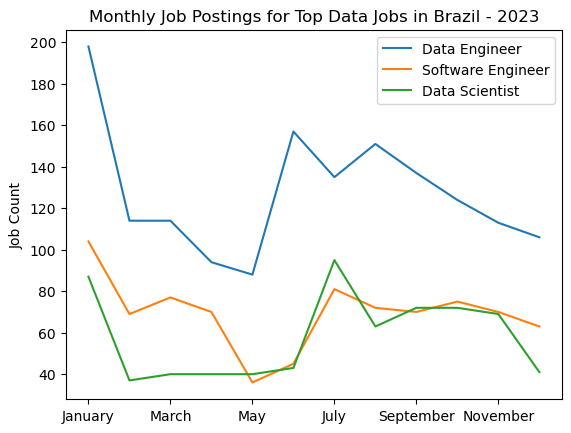

In [100]:
df_br_job_count[top_3_jobs].plot(kind='line')
plt.legend()
plt.title('Monthly Job Postings for Top Data Jobs in Brazil - 2023')
plt.ylabel('Job Count')
plt.xlabel('')
plt.show()